# Linear Mixed Effects Models in R and Python
https://jbhender.github.io/Stats506/F18/GP/Group16.html

In [9]:
import pandas as pd
AQ = pd.read_csv('C:/Users\gaborstefanics\Documents\GitHub\statistics-for-data-scientists\data/PRSA_data_2010.1.1-2014.12.31.csv')

# summary(d)
# head(d)
# str(d)

In [8]:
import statsmodels

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
AQ = pd.read_csv('C:/Users\gaborstefanics\Documents\GitHub\statistics-for-data-scientists\data/PRSA_data_2010.1.1-2014.12.31.csv')#read data
dic = {1: "Winter",
       2: "Winter",
       3: "Spring",
       4: "Spring",
       5: "Spring",
       6: "Summer",
       7: "Summer",
       8: "Summer",
       9: "Fall",
       10: "Fall",
       11: "Fall",
       12: "Winter"}
AQ['season'] = AQ['month'].map(dic)
AQ = AQ.dropna()
AQ = AQ[AQ['pm2.5'] > 0] #remove unresonable response values
AQ['pm25_log'] = np.log(AQ['pm2.5']) #do the log transformation on the response variable
# remove the outliers
AQ_cv = AQ[AQ['cbwd'] == 'cv']
AQ_cv = AQ_cv[(AQ_cv['pm25_log'] > 2.2) & (AQ_cv['pm25_log'] < 6.8)]
AQ_NE = AQ[AQ['cbwd'] == 'NE']
AQ_NE = AQ_NE[(AQ_NE['pm25_log'] > 0.5)]
AQ_NW = AQ[AQ['cbwd'] == 'NW']
AQ_NW = AQ_NW[(AQ_NW['pm25_log'] > 0.5)]
AQ_SE = AQ[AQ['cbwd'] == 'SE']
AQ_SE.sort_values(['pm25_log'], ascending=[False])
AQ_SE = AQ_SE[(AQ_SE['pm25_log'] > 0.5) & (AQ_SE['pm25_log'] < 6.291569)]
AQ_new = pd.concat([AQ_cv, AQ_NE, AQ_NW, AQ_SE])


# # boxplot for response grouped by cbwd
# qplot(cbwd, pm2 .5, facets = . ~ cbwd, 
#       colour = cbwd, geom = "boxplot", data = AQ)

In [16]:
#fit the model
mixed = smf.mixedlm("pm25_log ~ year+month+day+hour+DEWP+TEMP+PRES+Is+Ir", AQ_new, groups = AQ_new["cbwd"], re_formula="~hour+PRES")
mixed_fit = mixed.fit()
#print the summary
print(mixed_fit.summary())

C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning

            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  pm25_log   
No. Observations:    41615    Method:              REML       
No. Groups:          4        Scale:               0.6164     
Min. group size:     4755     Likelihood:          -49075.5507
Max. group size:     14562    Converged:           No         
Mean group size:     10403.8                                  
--------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept         38.066    7.715    4.934 0.000 22.945 53.186
year              -0.007    0.003   -2.486 0.013 -0.012 -0.001
month             -0.022    0.001  -18.286 0.000 -0.024 -0.019
day                0.006    0.000   14.789 0.000  0.006  0.007
hour               0.012    0.016    0.782 0.434 -0.019  0.044
DEWP               0.061    0.001  109.963 0.000  0.060  0.062
TEMP 

C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


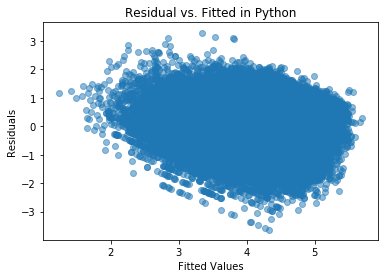

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

model = mixed_fit

plt.scatter(AQ_new['pm25_log'] - model.resid, model.resid, alpha = 0.5)
plt.title("Residual vs. Fitted in Python")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.savefig('python_plot.png',dpi=300)
plt.show()

# Mixed models
https://www.kaggle.com/ojwatson/mixed-models

In [1]:
# import modules needed
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import sklearn as sk
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in our data
data = pd.read_csv('C:/Users\gaborstefanics\Documents\GitHub\statistics-for-data-scientists\data//data.csv')
data.head(10)

,bounce_time,age,county,location
0,165.548520,16,devon,a
1,167.559314,34,devon,a
2,165.882952,6,devon,a
3,167.685525,19,devon,a
4,169.959681,34,devon,a
5,168.688747,47,devon,a
6,169.619382,7,devon,a
7,164.416273,8,devon,a
8,167.510430,8,devon,a
9,179.606068,7,devon,a


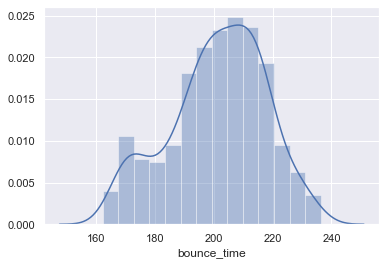

In [3]:
# plot the distribution of the bounce times - this creates the object that will be plotted when matplotlib.pyplot
sns.distplot(data.bounce_time)
plt.show()

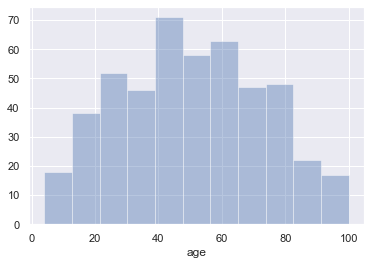

In [4]:
# plot the distribution of the ages
sns.distplot(data.age, kde=False)
plt.show()

In [5]:
# lets use the scale function from the preprocess package within sklearn
from sklearn import preprocessing
data["age_scaled"] = preprocessing.scale(data.age.values)

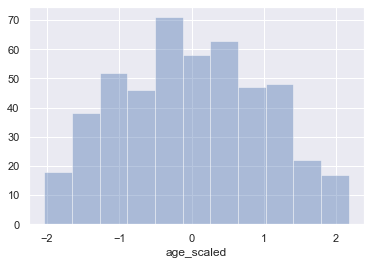

In [6]:
# plot the distribution
sns.distplot(data.age_scaled, kde=False)
plt.show()

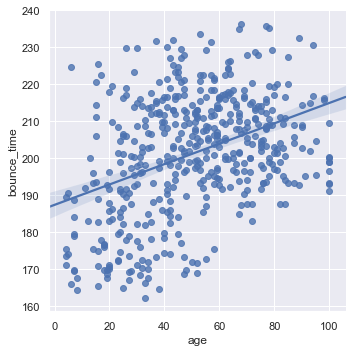

In [7]:
# let's use the lmplot function within seaborn
sns.lmplot(x = "age", y = "bounce_time", data = data)

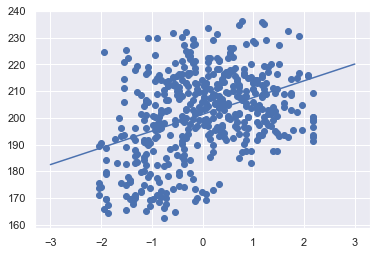

In [8]:
from sklearn.linear_model import LinearRegression

# construct our linear regression model
model = LinearRegression(fit_intercept=True)
x = data.age_scaled
y = data.bounce_time

# fit our model to the data
model.fit(x[:, np.newaxis], y)

# and let's plot what this relationship looks like 
xfit = np.linspace(-3, 3, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [9]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     6.279602007970821
Model intercept: 201.31646151854164


In [10]:
# and let's store the rmse
y_predict = model.predict(x.values.reshape(-1,1))
RMSE = sqrt(((y-y_predict)**2).values.mean())

results = pd.DataFrame()
results["Method"] = ["Linear Regression"]
results["RMSE"] = RMSE
results

,Method,RMSE
0,Linear Regression,14.928334


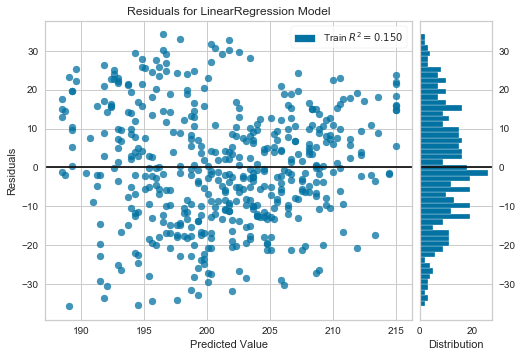

In [11]:
#!conda install -c districtdatalabs yellowbrick
import yellowbrick
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model = model)

visualizer.fit(x[:, np.newaxis], y)  # Fit the training data to the model
visualizer.poof()                    # Draw/show/poof the data

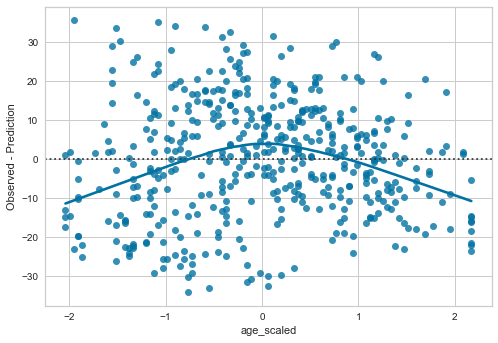

In [12]:
ax = sns.residplot(x = "age_scaled", y= "bounce_time", data = data, lowess = True)
ax.set(ylabel='Observed - Prediction')
plt.show()

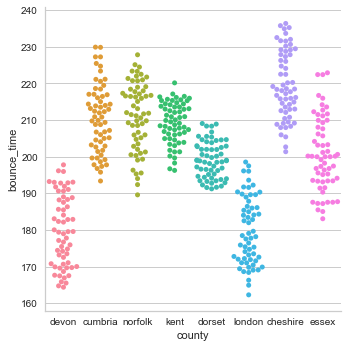

In [13]:
sns.catplot(x="county", y="bounce_time", data=data, kind = "swarm")

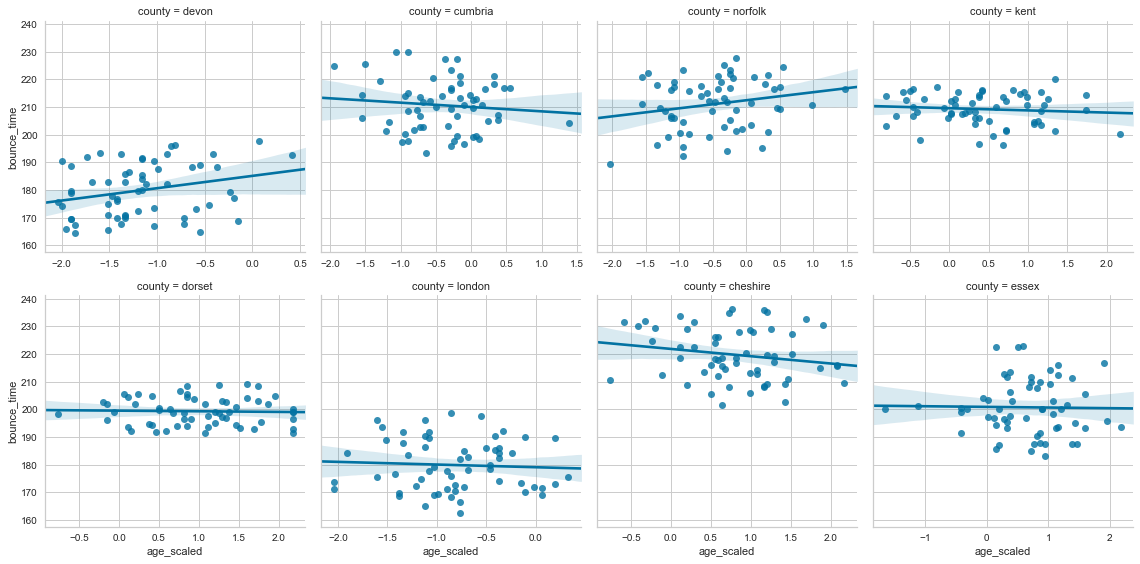

In [14]:
# let's use the lmplot function within seaborn
grid = sns.lmplot(x = "age_scaled", y = "bounce_time", col = "county", sharex=False, col_wrap = 4, data = data, height=4)

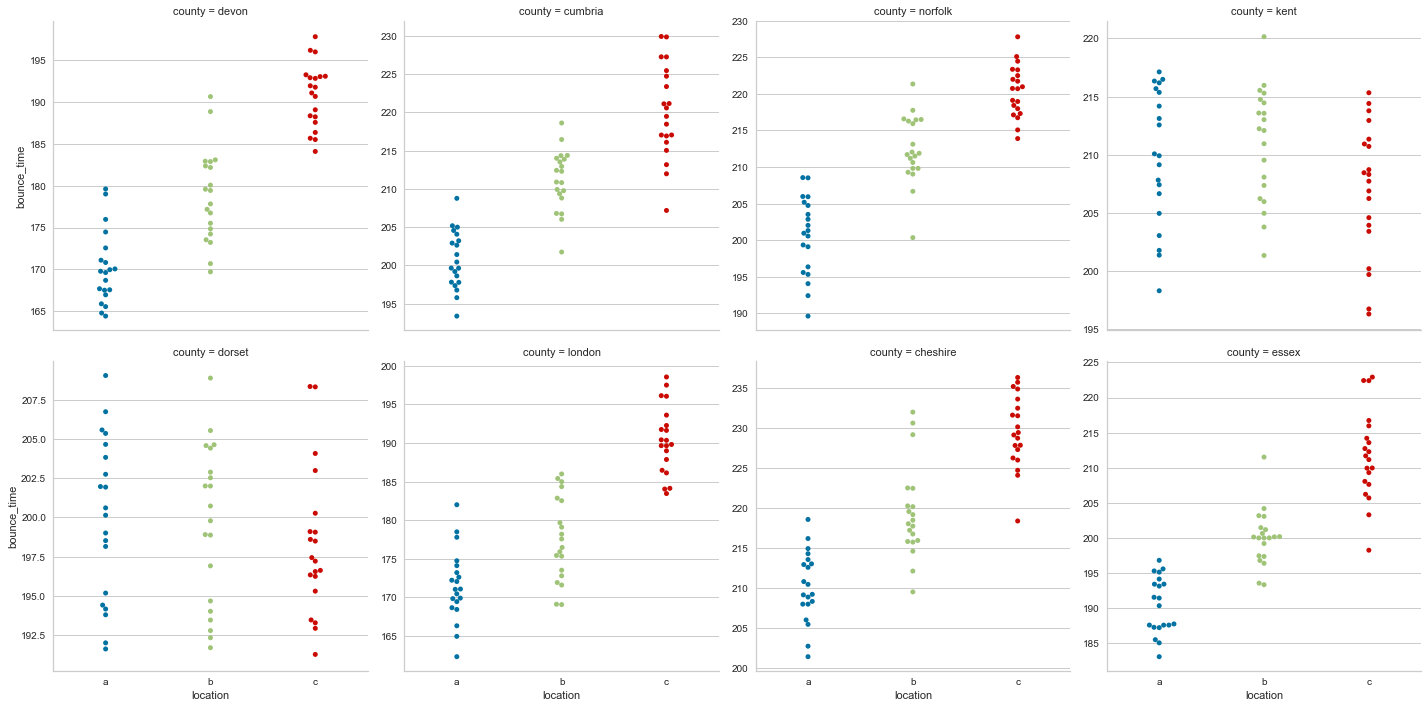

In [15]:
sns.catplot(x="location", y="bounce_time", col="county", col_wrap=4, sharey=False, data=data, kind = "swarm")

In [16]:
# make a new data frame with one hot encoded columns for the counties
counties = data.county.unique()
data_new = pd.concat([data,pd.get_dummies(data.county)],axis=1)
data_new.head()

,bounce_time,age,county,location,age_scaled,cheshire,cumbria,devon,dorset,essex,kent,london,norfolk
0,165.548520,16,devon,a,-1.512654,0,0,1,0,0,0,0,0
1,167.559314,34,devon,a,-0.722871,0,0,1,0,0,0,0,0
2,165.882952,6,devon,a,-1.951423,0,0,1,0,0,0,0,0
3,167.685525,19,devon,a,-1.381024,0,0,1,0,0,0,0,0
4,169.959681,34,devon,a,-0.722871,0,0,1,0,0,0,0,0


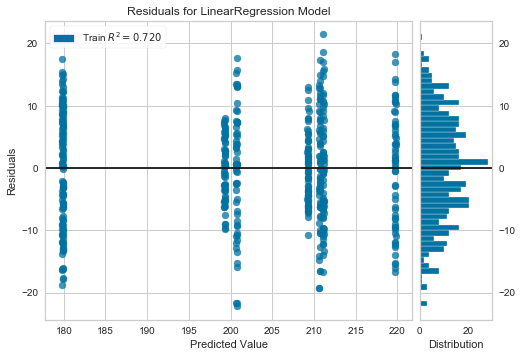

In [17]:
# construct our linear regression model
model = LinearRegression(fit_intercept=True)
x = data_new.loc[:,np.concatenate((["age_scaled"],counties))]
y = data.bounce_time

# fit our model to the data
model.fit(x, y)

# and let's plot what this relationship looks like 
visualizer = ResidualsPlot(model = model)
visualizer.fit(x, y)  # Fit the training data to the model
visualizer.poof()  

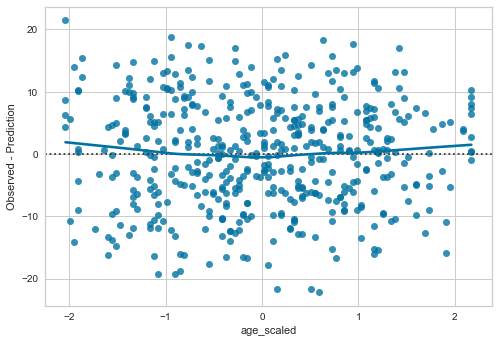

In [18]:
# and let's plot the predictions
performance = pd.DataFrame()
performance["residuals"] = model.predict(x) - data.bounce_time
performance["age_scaled"] = data.age_scaled
performance["predicted"] = model.predict(x)

ax = sns.residplot(x = "age_scaled", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

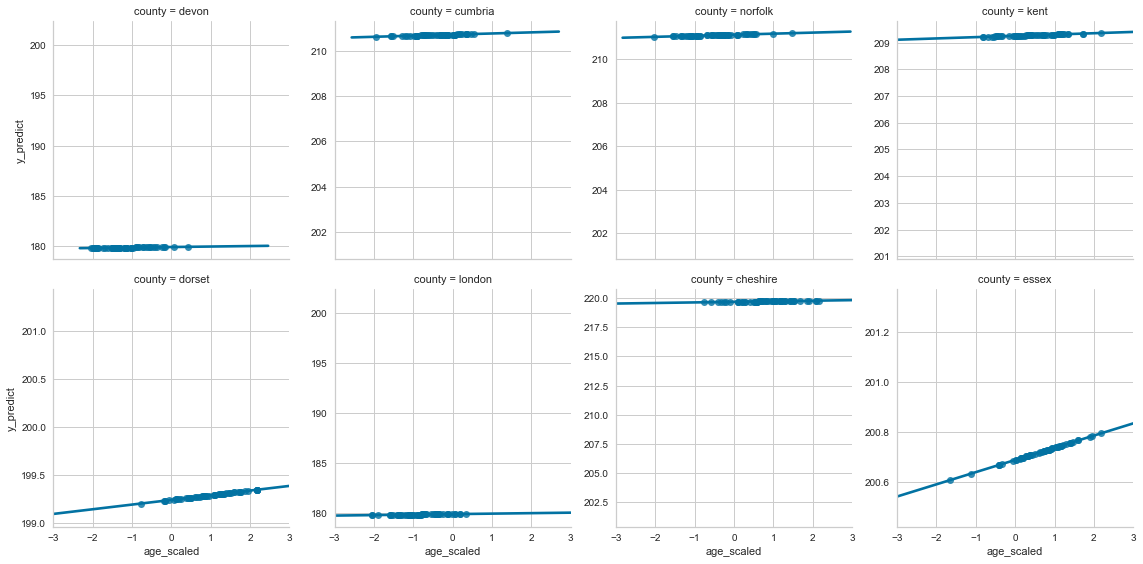

In [19]:
data_new["y_predict"] = model.predict(x)
grid = sns.lmplot(x = "age_scaled", y = "y_predict", col = "county", sharey=False, col_wrap = 4, data = data_new, height=4)
grid.set(xlim=(-3,3))

In [20]:
# and let's store the rmse
y_predict = model.predict(x)
RMSE = sqrt(((y-y_predict)**2).values.mean())
results.loc[1] = ["Fixed", RMSE]
results

,Method,RMSE
0,Linear Regression,14.928334
1,Fixed,8.563396


In [21]:
# coefficient for age and the counties
pd.DataFrame.from_records(list(zip(np.concatenate((["age_scaled"],counties)), model.coef_)))

,0,1
0,age_scaled,0.048782
1,devon,-21.381957
2,cumbria,9.391460
3,norfolk,9.824419
4,kent,7.938668
5,dorset,-2.079637
6,london,-21.437323
7,cheshire,18.372916
8,essex,-0.628546


In [22]:
#!conda install -c conda-forge statsmodels -y
import statsmodels.api as sm
import statsmodels.formula.api as smf

# construct our model, with our county now shown as a group
md = smf.mixedlm("bounce_time ~ age_scaled", data, groups=data["county"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: bounce_time
No. Observations: 480     Method:             REML       
No. Groups:       8       Scale:              74.7350    
Min. group size:  60      Likelihood:         -1733.0397 
Max. group size:  60      Converged:          Yes        
Mean group size:  60.0                                   
---------------------------------------------------------
             Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept   201.316    5.175 38.902 0.000 191.174 211.459
age_scaled    0.136    0.612  0.221 0.825  -1.065   1.336
Group Var   212.999   13.382                             



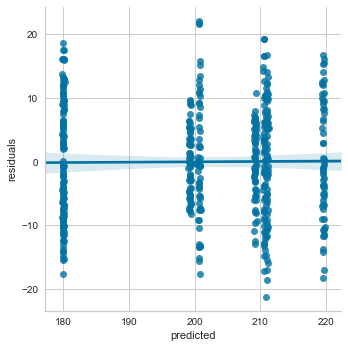

In [23]:
# and let's plot the predictions
performance = pd.DataFrame()
performance["residuals"] = mdf.resid.values
performance["age_scaled"] = data.age_scaled
performance["predicted"] = mdf.fittedvalues

sns.lmplot(x = "predicted", y = "residuals", data = performance)

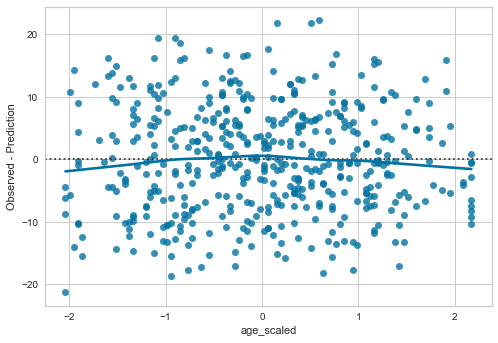

In [24]:
ax = sns.residplot(x = "age_scaled", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

In [25]:
# and let's store the rmse
y_predict = mdf.fittedvalues
RMSE = sqrt(((y-y_predict)**2).values.mean())
results.loc[2] = ["Mixed", RMSE]
results

,Method,RMSE
0,Linear Regression,14.928334
1,Fixed,8.563396
2,Mixed,8.563948


In [26]:
# construct our model, but this time we will have a random interecept AND a random slope with respect to age
md = smf.mixedlm("bounce_time ~ age_scaled", data, groups=data["county"], re_formula="~age_scaled")
mdf = md.fit()
print(mdf.summary())

C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


               Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    bounce_time
No. Observations:      480        Method:                REML       
No. Groups:            8          Scale:                 72.8722    
Min. group size:       60         Likelihood:            -1733.3946 
Max. group size:       60         Converged:             No         
Mean group size:       60.0                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------
Intercept              202.140    8.356 24.190 0.000 185.762 218.518
age_scaled               0.161    1.196  0.134 0.893  -2.184   2.505
Group Var              558.143                                      
Group x age_scaled Cov -51.614                                      
age_scaled Var           8.621                    

C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


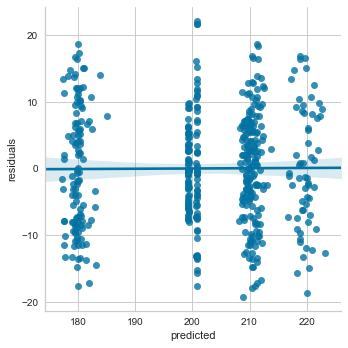

In [27]:
# and let's plot the predictions
performance = pd.DataFrame()
performance["residuals"] = mdf.resid.values
performance["age_scaled"] = data.age_scaled
performance["predicted"] = mdf.fittedvalues

sns.lmplot(x = "predicted", y = "residuals", data = performance)

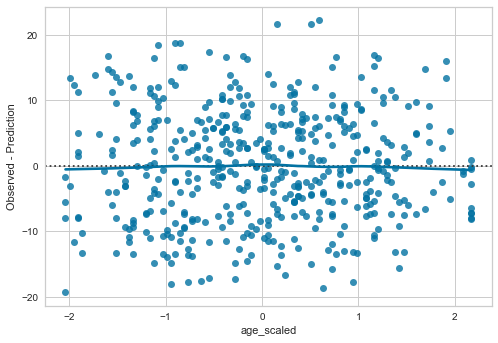

In [28]:
ax = sns.residplot(x = "age_scaled", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

In [29]:
# and let's store the rmse
y_predict = mdf.fittedvalues
RMSE = sqrt(((y-y_predict)**2).values.mean())
results.loc[3] = ["Mixed_Random_Slopes", RMSE]
results

,Method,RMSE
0,Linear Regression,14.928334
1,Fixed,8.563396
2,Mixed,8.563948
3,Mixed_Random_Slopes,8.475248


In [35]:
from scipy import stats

# construct our linear regression model
lm = LinearRegression(fit_intercept=True)
x = data.age
y = data.bounce_time

# fit our model to the data
lm.fit(x[:, np.newaxis], y)

# let's get our fitted parameters for the intercept and coefficient and what our predictions are
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(x.values.reshape(-1, 1))

# and let's simulate some new data for the model and then compare what the error is for these 
newx = pd.DataFrame({"Constant":np.ones(len(x))}).join(pd.DataFrame(x))
MSE = (sum((y-predictions)**2))/(len(newx)-len(newx.columns))

# and whats the variance, standard deviation, t values and p-values
var_b = MSE*(np.linalg.inv(np.dot(newx.T,newx)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newx)-1))) for i in ts_b]

# and let's group it together
names = ["intercept", "age"]
summary = pd.DataFrame()
summary["names"],summary["Coefficients"],summary["Standard Errors"] = [names,params,sd_b]
summary["t values"],summary["Probabilites"] = [ts_b,p_values]
# print(summary)
summary

,names,Coefficients,Standard Errors,t values,Probabilites
0,intercept,187.409130,1.659208,112.950956,0.0
1,age,0.275529,0.029959,9.196758,0.0


In [36]:
newx

,Constant,age
0,1.0,16
1,1.0,34
2,1.0,6
3,1.0,19
4,1.0,34
5,1.0,47
6,1.0,7
7,1.0,8
8,1.0,8
9,1.0,7


In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

model = LinearRegression(fit_intercept=True)
rms = np.empty(counties.size)
mse = np.empty(counties.size)

for i in range(counties.size):
    county = counties[i]
    x = data.age[data.county == county].values.reshape(-1,1)
    y = data.bounce_time[data.county == county]
    fit = model.fit(x, y)
    predict = model.predict(x)
    mse[i] = mean_squared_error(y, predict)
    rms[i] = sqrt(mse[i])

sqrt(mse.sum())

23.914852863665146

In [32]:
# construct our model, with our county now shown as a group
data["location_county"] = data["location"] + "_" + data["county"]
data.head()

md = smf.mixedlm("bounce_time ~ age_scaled", data, groups=data["location_county"], re_formula="~age_scaled")
mdf = md.fit()
print(mdf.summary())

C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


               Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    bounce_time
No. Observations:      480        Method:                REML       
No. Groups:            24         Scale:                 23.7951    
Min. group size:       20         Likelihood:            -1504.9092 
Max. group size:       20         Converged:             No         
Mean group size:       20.0                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------
Intercept              201.493    3.448 58.439 0.000 194.735 208.250
age_scaled               0.151    0.393  0.385 0.700  -0.618   0.921
Group Var              282.798   21.303                             
Group x age_scaled Cov  -8.363    2.488                             
age_scaled Var           0.389    0.495           

C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gaborstefanics\.conda\envs\pt35\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)


In [33]:
# and let's store the rmse
y_predict = mdf.fittedvalues
RMSE = sqrt(((y-y_predict)**2).mean())
results.loc[3] = ["Nested_Mixed", RMSE]
results

,Method,RMSE
0,Linear Regression,14.928334
1,Fixed,8.563396
2,Mixed,8.563948
3,Nested_Mixed,4.790665
